# Assessment Outline


Assessment Task:

This part of the assessment aims to evaluate your ability to apply project management methodology to
develop and execute a capstone project. You will select a dataset, conduct exploratory data analysis,
pre-process the data and present your findings effectively through a comprehensive report.
The overall capstone project will be based on a dataset of your choice from any domain, such as finance,
marketing, or any other.
For this element of the project, you must submit a comprehensive report detailing the following;
- ● Strategic overview of the business problem
- ● Project Plan
- ● Business understanding
- ● Data understanding
- ● Data preparation
- ● Findings & Recommendations

The dataset used in this project was takem from : www.kaggle.com. (n.d.).[online] Available at: 

https://www.kaggle.com/datasets/cristaliss/ryanair-reviews-ratings/data.


- Ryanair, one of the principal low-cost airlines operating across Europe, is committed to delivering affordable air travel while maintaining an operational efficiency that differentiates it from its competitors. However, the low-cost model presents unique challenges, particularly in passenger experience management.


- Ryanair faces pressure from multiple fronts: increased competition from both traditional carriers and other budget airlines, coupled with rising customer expectations for service quality. As digital platforms become primary channels for customers to voice their experiences, understanding and responding to these sentiments is crucial for retaining market share.


Import Libraries: 

In [1]:
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

import matplotlib.pyplot as plt
import numpy as np

Preparing to read the dataset, taking consideration of all types of missing values: 

In [2]:
mvf = ['no','n.a.', 'NaN', 'na', '?']

Loading/reading the dataset:

In [3]:
flight =pd.read_csv(r'C:\Users\santo\Desktop\ryanair.csv', na_values= mvf)


Display of the dataset displaying max number of columns :

In [4]:
pd.set_option("display.max.column", None) 
flight     

,Unnamed: 0,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Aircraft,Type Of Traveller,Seat Type,Origin,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity
0,0,2024-02-03,10.0,United Kingdom,Not Verified,"""bang on time and smooth flights""",Flew back from Faro to London Luton Friday 2nd...,Boeing 737 900,Family Leisure,Economy Class,Faro,Luton,February 2024,4.0,5.0,3.0,4.0,4.0,yes,NaN,NaN
1,1,2024-01-26,10.0,United Kingdom,Trip Verified,"""Another good affordable flight""",Another good affordable flight with Ryanair. O...,NaN,Couple Leisure,Economy Class,Belfast,Alicante,January 2024,3.0,5.0,3.0,5.0,5.0,yes,NaN,NaN
2,2,2024-01-20,10.0,United Kingdom,Trip Verified,“Really impressed!”,"Really impressed! You get what you pay for, th...",Boeing 737-800,Couple Leisure,Economy Class,Edinburgh,Paris Beauvais,October 2023,5.0,5.0,4.0,5.0,5.0,yes,NaN,NaN
3,3,2024-01-07,6.0,United Kingdom,Trip Verified,“a decent offering from Ryanair”,I should like to review my flight from Faro to...,Boeing 737,Solo Leisure,Economy Class,Faro,Liverpool,January 2024,3.0,2.0,1.0,3.0,3.0,yes,NaN,NaN
4,4,2024-01-06,10.0,Israel,Trip Verified,“cabin crew were welcoming and friendly”,"Flight left the gate ahead of schedule, fare w...",Boeing 737-800,Solo Leisure,Economy Class,Dublin,Manchester,January 2024,4.0,5.0,NaN,4.0,5.0,yes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,2244,2012-08-28,2.0,United Kingdom,NaN,Ryanair customer review,Myself and my daughter took a holiday to Kos. ...,NaN,NaN,Economy Class,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN
2245,2245,2012-08-28,1.0,United Kingdom,NaN,Ryanair customer review,Stansted to Pula. Tried to adhere to all rules...,NaN,NaN,Economy Class,NaN,NaN,NaN,3.0,2.0,0.0,NaN,1.0,NaN,NaN,NaN
2246,2246,2012-08-28,1.0,United Kingdom,NaN,Ryanair customer review,When printing the boarding tickets we got our ...,NaN,NaN,Economy Class,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN
2247,2247,2012-08-28,1.0,Australia,NaN,Ryanair customer review,Budapest - Manchester and back again with a 5 ...,NaN,NaN,Economy Class,NaN,NaN,NaN,1.0,1.0,1.0,NaN,2.0,NaN,NaN,NaN


Using ".info" to display important information about the Dataswt:

In [5]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249 entries, 0 to 2248
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2249 non-null   int64  
 1   Date Published          2249 non-null   object 
 2   Overall Rating          2119 non-null   float64
 3   Passenger Country       2249 non-null   object 
 4   Trip_verified           1305 non-null   object 
 5   Comment title           2249 non-null   object 
 6   Comment                 2249 non-null   object 
 7   Aircraft                551 non-null    object 
 8   Type Of Traveller       1635 non-null   object 
 9   Seat Type               2249 non-null   object 
 10  Origin                  1634 non-null   object 
 11  Destination             1634 non-null   object 
 12  Date Flown              1631 non-null   object 
 13  Seat Comfort            2137 non-null   float64
 14  Cabin Staff Service     2128 non-null   

- Ryanair Dataset presents a comprehensive collection of 2,249 entries, comprising various details with a total of 21 columns. Each entry represents feedback data, from Ryanair passengers.

- The dataset includes unique identifiers for each entry in the 'Unnamed: 0' column. 'Date Published' outlines when the feedback was officially logged, while 'Overall Rating' offers a numerical perspective on customer satisfaction, though it contains some missing values, as noted by the 2,119 non-null entries.

- Passenger demographics and experiences are captured through columns such as 'Passenger Country', 'Type Of Traveller', and 'Seat Type', with 'Passenger Country' being fully populated, whereas 'Type Of Traveller' and other experience-based details show varying degrees of completeness. For example, 'Aircraft' and 'Recommended' have very sparse entries compared to others.

- On the topic of the flight experience, columns like 'Seat Comfort', 'Cabin Staff Service', and 'Food & Beverages' provide insights, although not all feedback includes these ratings, suggesting potential areas of either data entry inconsistency or participant selectivity. There is a notable gap in technology-oriented feedback—'Inflight Entertainment' and 'Wifi & Connectivity' contain particularly scarce information, which may indicate these features are not universally present on flights, or they are simply less commented upon by passengers.

- Commercial insights might be drawn from the 'Value For Money' column, almost fully populated, offering perhaps the most reliable indicator of perceived service cost-effectiveness. Additionally, the 'Recommended' column, although suggestive of customer loyalty and satisfaction, is underrepresented.

 Checking for duplicated values:

In [6]:
flight.duplicated().sum()

0

Check for Qty of missing values:


In [7]:
flight.isnull().sum()

Unnamed: 0                   0
Date Published               0
Overall Rating             130
Passenger Country            0
Trip_verified              944
Comment title                0
Comment                      0
Aircraft                  1698
Type Of Traveller          614
Seat Type                    0
Origin                     615
Destination                615
Date Flown                 618
Seat Comfort               112
Cabin Staff Service        121
Food & Beverages           937
Ground Service             671
Value For Money              1
Recommended               1377
Inflight Entertainment    1918
Wifi & Connectivity       1981
dtype: int64

Apply "msno.matrix" to visualise missing data pattern:

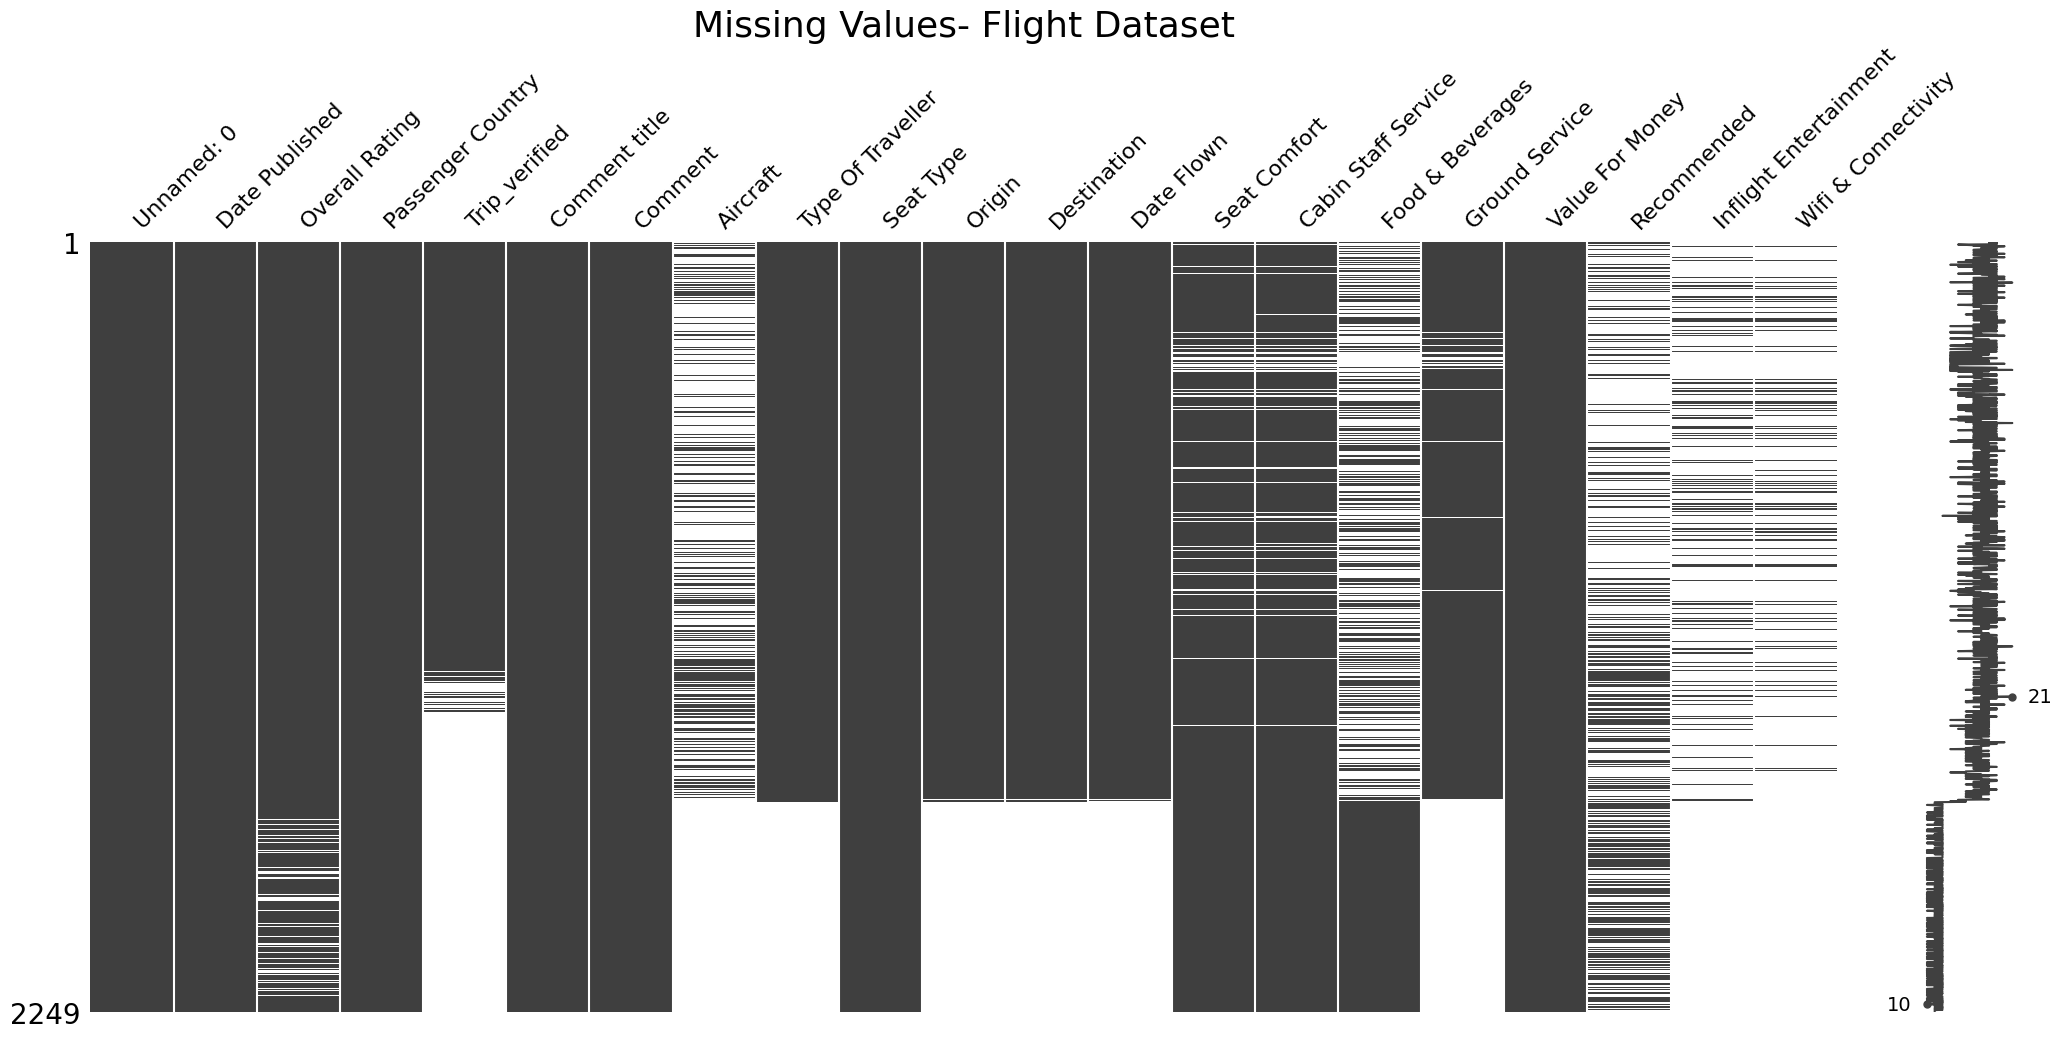

In [8]:
msno.matrix(flight)
plt.title("Missing Values- Flight Dataset", fontsize=26)
plt.show()

- The application of msno.matrix reveals that there are no correlations or patterns among the missing values in the dataset.

Check the percentage of missing values in each columns of the dataset:

In [9]:
flight.isnull().sum() / len(flight) * 100

Unnamed: 0                 0.000000
Date Published             0.000000
Overall Rating             5.780347
Passenger Country          0.000000
Trip_verified             41.974211
Comment title              0.000000
Comment                    0.000000
Aircraft                  75.500222
Type Of Traveller         27.301023
Seat Type                  0.000000
Origin                    27.345487
Destination               27.345487
Date Flown                27.478880
Seat Comfort               4.979991
Cabin Staff Service        5.380169
Food & Beverages          41.662961
Ground Service            29.835482
Value For Money            0.044464
Recommended               61.227212
Inflight Entertainment    85.282348
Wifi & Connectivity       88.083593
dtype: float64

- The percentage of missing values in the dataset highlights important aspects of data quality and raises concerns in certain areas. There are particularly high rates of missing data in the 'Inflight Entertainment' and 'Wifi & Connectivity' columns, which have missing values of 85.28% and 88.08%, respectively. This large amount of missing information may suggest that passengers either did not provide feedback on these services or that they were not available during flights, making it difficult to assess passenger satisfaction in these areas.

- Furthermore, the 'Recommended' column has a missing value percentage of 61.23%, indicating that many passengers did not state whether they would recommend the flight, potentially impacting overall satisfaction ratings. The 'Trip_verified' column also shows a high missing rate of 41.97%, raising doubts about the reliability of the feedback, as verified trips are typically more trustworthy.

- In contrast, essential columns like 'Overall Rating', 'Passenger Country', and 'Comment' have much lower percentages of missing values, suggesting better data completeness in these areas. However, the 5.78% of missing values in 'Overall Rating' should be acknowledged, as it could influence the accuracy of insights regarding overall passenger satisfaction.

Checking unique value in each column of the dataset:

In [10]:
flight.nunique()

Unnamed: 0                2249
Date Published            1403
Overall Rating              10
Passenger Country           73
Trip_verified                5
Comment title             1511
Comment                   2249
Aircraft                    49
Type Of Traveller            4
Seat Type                    4
Origin                     283
Destination                347
Date Flown                 110
Seat Comfort                 6
Cabin Staff Service          6
Food & Beverages             6
Ground Service               5
Value For Money              6
Recommended                  1
Inflight Entertainment       5
Wifi & Connectivity          5
dtype: int64

- The review of unique values in the dataset reveals important details about its structure and variety. The 'Comment' column has 2,249 entries, showing that nearly all passengers shared their feedback, indicating strong engagement in sharing their experiences. However, the 'Overall Rating' column only has 10 unique ratings, suggesting that the ratings are limited and might indicate generally lower satisfaction levels among passengers.

- The 'Date Published' column has 1,403 different values, implying that many reviews were submitted over time, which could help uncover trends in passenger opinions based on their travel dates. In comparison, the 'Passenger Country' column includes 73 unique countries, pointing to a diverse group of travellers, which could assist airlines in tailoring their services to specific audiences.

- The low unique values in 'Trip_verified' (5 unique values) and 'Recommended' (1 unique value) raise concerns about the reliability of some feedback and the lack of clear endorsements from passengers, suggesting that there may be limited verification of reviews or that passengers are hesitant to recommend their flights.

- On a positive note, columns like 'Aircraft', 'Type Of Traveller', 'Seat Type', 'Origin', and 'Destination' have a good number of unique values, indicating a variety of options for passengers and reflecting the broad range of routes and services provided by the airline.

Dropping unnecessary column: "Unnamed"

In [11]:
flight.drop(columns=['Unnamed: 0'], inplace=True)

Convert columns to appropriate data types:

In [12]:
# Convert date columns to datetime format

flight['Date Published'] = pd.to_datetime(flight['Date Published'])
flight['Date Flown'] = pd.to_datetime(flight['Date Flown'])

# Define columns for type conversion
float_columns = [
    'Overall Rating',
    'Seat Comfort',
    'Cabin Staff Service',
    'Food & Beverages',
    'Ground Service',
    'Value For Money'
]


flight[float_columns] = flight[float_columns].astype(float)

# Convert 'Trip_verified' to bool
flight['Trip_verified'] = flight['Trip_verified'].astype(bool)

Confirm that each column has the correct data type:

In [13]:
flight.dtypes

Date Published            datetime64[ns]
Overall Rating                   float64
Passenger Country                 object
Trip_verified                       bool
Comment title                     object
Comment                           object
Aircraft                          object
Type Of Traveller                 object
Seat Type                         object
Origin                            object
Destination                       object
Date Flown                datetime64[ns]
Seat Comfort                     float64
Cabin Staff Service              float64
Food & Beverages                 float64
Ground Service                   float64
Value For Money                  float64
Recommended                       object
Inflight Entertainment           float64
Wifi & Connectivity              float64
dtype: object

# Treating Missing Values:
Given the number of missing values in the dataset, different strategies will be suitable based on the characteristics of each column and the extent of the missing data. 

- For numeric columns with a moderate amount of missing values, employing measures of central tendency, such as the mean or median, proves to be effective. 
- In the case of categorical columns, using the mode or introducing a category like "Unknown" can be beneficial. 
- When a column exhibits a very high percentage of missing data, it may be advisable to use placeholders that do not compromise the integrity of the data, such as "Unknown" or "Not Applicable."
- Columns that have large amount of missing data are unlikely to provide enough useful information and could introduce confusion if an attempt is made to fill in the missing values. for that reason thwy will be removed from the dataset. 

Fill missing values for numerical columns with median values:

In [14]:
numerical_columns = [
    'Overall Rating', 
    'Seat Comfort', 
    'Cabin Staff Service', 
    'Food & Beverages', 
    'Ground Service', 
    'Value For Money'
]

for column in numerical_columns:
    flight[column].fillna(flight[column].median(), inplace=True)



Fill missing values for categorical columns with mode or placeholder:

In [15]:
flight['Trip_verified'].fillna('Not-Sure', inplace=True)
flight['Type Of Traveller'].fillna('Unknown', inplace=True)
flight['Origin'].fillna('Unknown', inplace=True)
flight['Destination'].fillna('Unknown', inplace=True)
flight['Date Flown'].fillna('Unknown Date', inplace=True)



Fill Value For Money with mean:

In [16]:
flight['Value For Money'].fillna(flight['Value For Money'].mean(), inplace=True)

Columns that have over 60% missing data, like Recommended, "Inflight Entertainment" and "Wifi & Connectivity," are unlikely to provide enough useful information and could introduce confusion if an attempt is made to fill in the missing values.

------------------------------------------------------------------------------------------------------------------
the missing values associated with those columns couuld be that passengers might not have encountered or used these airline services during their flight, leading to them skipping these questions. For instance, if a passenger did not use inflight entertainment, they may have left that rating blank. If an airline doesn't provide certain services on all flights (e.g., inflight entertainment or WiFi), passengers on those flights would have no option to respond, thus resulting in blank entries.

--------------------------------------------------------------------------------------------------------------------
for that reason olumns "Recommended," "Inflight Entertainment," and "Wifi & Connectivity," will be removed.



Dropping columns  Recommended, Rnflight Entertainment and Wifi & Connectivity:

In [17]:
flight.drop(["Recommended", "Inflight Entertainment", "Wifi & Connectivity","Aircraft"], axis=1, inplace=True)

check ow the dataset look after cleaning phase:

In [18]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249 entries, 0 to 2248
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date Published       2249 non-null   datetime64[ns]
 1   Overall Rating       2249 non-null   float64       
 2   Passenger Country    2249 non-null   object        
 3   Trip_verified        2249 non-null   bool          
 4   Comment title        2249 non-null   object        
 5   Comment              2249 non-null   object        
 6   Type Of Traveller    2249 non-null   object        
 7   Seat Type            2249 non-null   object        
 8   Origin               2249 non-null   object        
 9   Destination          2249 non-null   object        
 10  Date Flown           2249 non-null   object        
 11  Seat Comfort         2249 non-null   float64       
 12  Cabin Staff Service  2249 non-null   float64       
 13  Food & Beverages     2249 non-nul

# Descriptive Statistics

In [19]:
flight.describe()

,Date Published,Overall Rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money
count,2249,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000
mean,2017-10-06 01:50:07.736771840,4.300578,2.354824,2.760783,1.537572,1.811472,2.731436
min,2012-08-23 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2015-04-22 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2017-10-11 00:00:00,3.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,2019-09-08 00:00:00,8.000000,3.000000,4.000000,2.000000,2.000000,5.000000
max,2024-02-03 00:00:00,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000
std,NaN,3.465437,1.260693,1.494548,1.227117,1.356424,1.692272


The .describe() function provides a statistical summary of the numerical columns in the FLight dataset, which includes key metrics such as count, mean, minimum, maximum, standard deviation and percentiles. 

From the results, it can be observed that:

- Date Published spans from 23rd August 2012 to 3rd February 2024, indicating a comprehensive timeframe for the dataset.
- The Overall Rating has a mean score of approximately 4.30, which suggests that passengers generally have a positive experience overall. The ratings range from a minimum of 1 to a maximum of 10, indicating the potential for significant variability in customer satisfaction.
- Ratings for Seat Comfort have a mean of about 2.35, with values ranging from 0 to 5, suggesting that this may be an area requiring improvement, as the average rating is relatively low.
- Cabin Staff Service averages at approximately 2.76, also indicating a modest level of satisfaction. Ratings in this category span from 0 to 5.
- The Food & Beverages rating highlights a lower average of 1.54, indicating room for development in this service area, with the lowest possible score being 0.
- Ground Service yields an average rating of about 1.81, the maximum rating being 5, which again signifies potential dissatisfaction among passengers regarding ground services.
- The Value for Money aspect scores an average of 2.73, implying that while some passengers find good value, the scores suggest that this might not be the case for all.

In [20]:
flight.describe(include=object)

,Passenger Country,Comment title,Comment,Type Of Traveller,Seat Type,Origin,Destination,Date Flown
count,2249,2249,2249,2249,2249,2249,2249,2249
unique,73,1511,2249,5,4,284,348,111
top,United Kingdom,Ryanair customer review,Flew back from Faro to London Luton Friday 2nd...,Unknown,Economy Class,Unknown,Unknown,Unknown Date
freq,1167,699,1,614,2229,615,615,618


Now, Applying descriptive statistic in the categorical features, it can be observed that: 

- Passenger Country: There are 73 unique countries represented, indicating a diverse range of passenger nationalities. The most frequent country, with 1,167 mentions, is the United Kingdom, suggesting a strong customer base or frequent reviews from this location.

- Comment Title and Comment: There are 1,511 unique comment titles and 2,249 unique comments, highlighting a wide variety of experiences and perceptions shared by passengers. The most common comment title appears 699 times, pointing to frequently shared experiences or issues.

- Aircraft and Seat Type: Both descriptions often default to "Unknown," with the latter having 2229 mentions under Economy Class, showing that many reviews lack specific details about the aircraft type but mostly pertain to economy seating.

- Type Of Traveller: This category includes 5 unique types, but "Unknown" is the most frequent classification, occurring 614 times, indicating data gaps where traveller types were not identified.

- Origin and Destination: There are 284 unique origin airports and 348 unique destinations. Both categories have "Unknown" as the most frequent mention, each with 615 occurrences, suggesting either data privacy issues or incomplete data capture.

- Date Flown: The date of flight is also often unspecified with the top frequency being 618 for "Unknown Date," which restricts detailed analysis based on time of travel.

 Renaming columns for readability:

In [21]:
flight.rename(columns={
    'Date Published': 'Published',
    'Overall Rating': 'Overall_Rating',
    'Seat Comfort': 'Comfort',
    'Cabin Staff Service': 'Staff',
    'Value For Money': 'Worth',
    'Food & Beverages': 'Food',
    'Ground Service': 'Ground',
    'Passenger Country': 'Country',
    'Trip_verified': 'Verified',
    'Comment title': 'Title',
    'Type Of Traveller': 'Traveller',    
    'Seat Type': 'Seat'
    
}, inplace=True)

Plot numerical distributions:

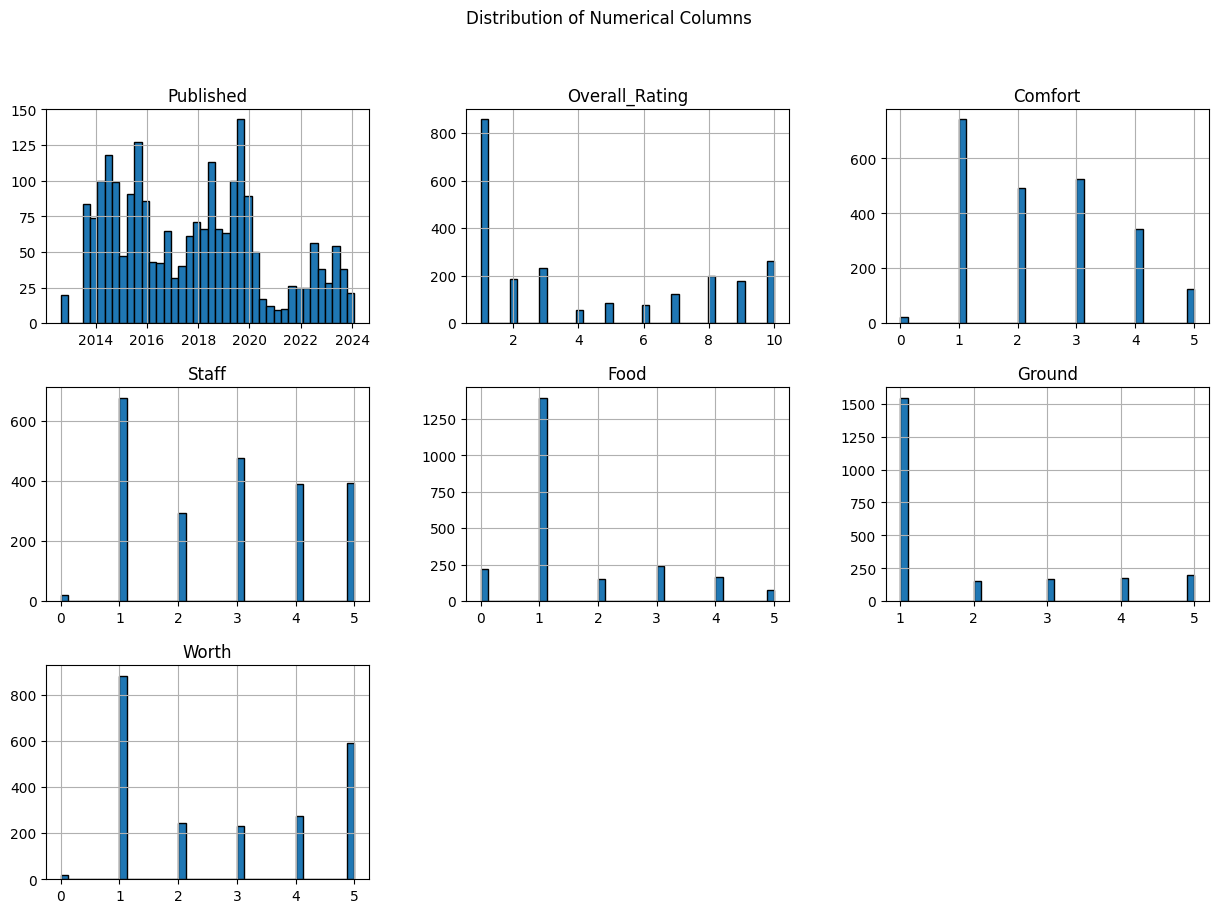

In [22]:
flight.hist(bins=40, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Numerical Columns')
plt.show()

Based on the Distribution of Numerical Columns:

- Temporal Coverage - provides insights over a significant period. This broad time range allows for the observation of trends and changes in passenger perceptions over time.

- Overall Rating shows a generally positive experience for many passengers, but also highlights significant variability.

- Seat comfort appears to be a common area of dissatisfaction. This indicates a potential need for airlines to focus on enhancing comfort levels to improve passenger satisfaction.

- Cabin Staff Service shows moderate satisfaction with cabin staff. Some passengers have had excellent experiences, yet there is room for improvement to raise the overall perception.

- Food & Beverages is a significant area of concern for passengers. Most passagers gave 1 , indicating that food and beverage services might not be meeting passenger expectations across the board.

- Ground service seems to be another area requiring attention. There may be inconsistencies or deficiencies in airport services that affect the overall travel experience.

- The wide range in values for money, demonstrate that while some passengers find the service worth the price, many do not.


In [23]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249 entries, 0 to 2248
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Published       2249 non-null   datetime64[ns]
 1   Overall_Rating  2249 non-null   float64       
 2   Country         2249 non-null   object        
 3   Verified        2249 non-null   bool          
 4   Title           2249 non-null   object        
 5   Comment         2249 non-null   object        
 6   Traveller       2249 non-null   object        
 7   Seat            2249 non-null   object        
 8   Origin          2249 non-null   object        
 9   Destination     2249 non-null   object        
 10  Date Flown      2249 non-null   object        
 11  Comfort         2249 non-null   float64       
 12  Staff           2249 non-null   float64       
 13  Food            2249 non-null   float64       
 14  Ground          2249 non-null   float64       
 15  Wort

Create a boxplot for the numerical columns in the dataset (better tool to visualise outliers):

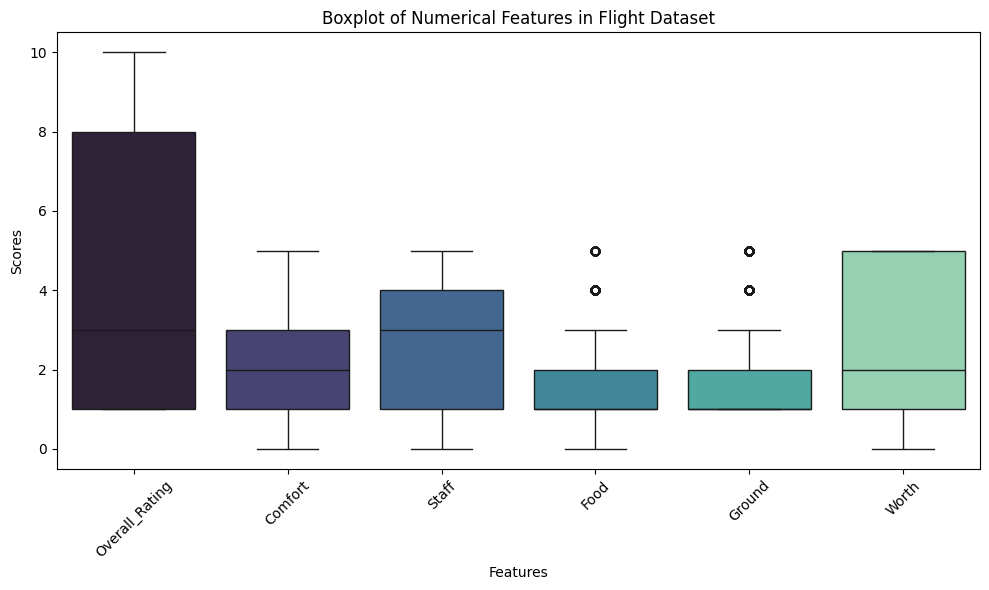

In [24]:
numerical_features = ['Overall_Rating', 'Comfort', 'Staff', 'Food', 'Ground', 'Worth']
sns.set_palette("mako")

plt.figure(figsize=(10, 6))
sns.boxplot(data=flight[numerical_features])
plt.title('Boxplot of Numerical Features in Flight Dataset')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

BOXPLOT analysis:

- Overall Rating: The boxplot indicates that while there are some high ratings, a significant concentration of passengers has given low ratings, suggesting dissatisfaction. The presence of low outliers indicates that certain passengers experienced extremely poor service, contrasting sharply with a few very high ratings.

- Seat Comfort: This category shows a lower median score, with many ratings clustered towards the lower end of the scale. Several outliers at the bottom reveal that some passengers found the seating extremely uncomfortable, highlighting a potential area for improvement.

- Cabin Staff Service: Similar to seat comfort, the boxplot illustrates a low median rating, accompanied by a few very high outliers. The range of ratings indicates varied experiences, where some passengers felt the service was significantly better than the average.

- Food and Beverages: The ratings in this category show a notable number of low outliers, suggesting many passengers were unhappy with the quality of food and beverages provided. The compact nature of the box indicates limited variation among those that rated it higher.

- Ground Service: The boxplot shows a somewhat higher median rating; however, the presence of low outliers suggests some passengers had disappointing experiences, which could indicate problems with the service provided before or after flights.

- Value for Money: This category depicts a pervasive dissatisfaction reflected in lower ratings. The outlying values at the lower end suggest that many passengers do not feel the services provided matched the cost of their fares.

Distribution of overall ratings: 

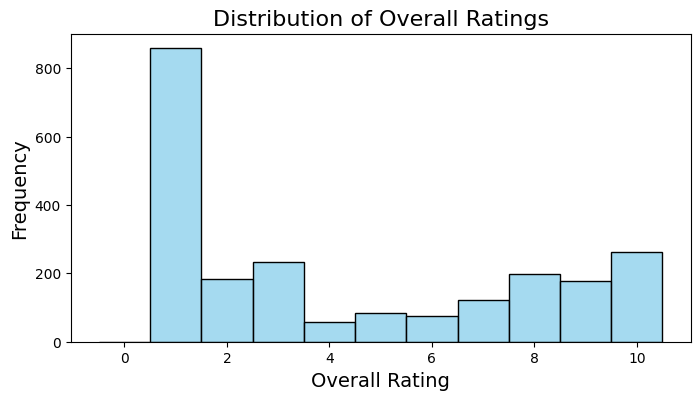

In [25]:
plt.figure(figsize=(8, 4))
sns.histplot(flight['Overall_Rating'], bins=np.arange(12) - 0.5, color= 'skyblue')
plt.title('Distribution of Overall Ratings', fontsize=16)
plt.xlabel('Overall Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

- The distribution of ratings indicates that many passengers tend to rate their experiences lower, particularly around the scores of 1, 2, and 3, with about 800 passengers giving these ratings each. There is a noticeable drop in the number of ratings as they increase to 4, 5, 6, and 7, where roughly 100 passengers rated their experience at each of these scores. Ratings start to increase again with scores of 8 and 9, fetching around 200 ratings each. The highest score of 10 sees the greatest number of responses, with about 300 passengers giving this rating. Overall, the pattern shows a tendency towards lower ratings, and since most passengers do not rate above 8, this indicates there are significant opportunities to improve passenger satisfaction.

How do ratings differ among various types of travellers?

- Analysing how ratings differ among various types of travellers gives a clear picture of customer satisfaction. This information can help Ryanair to improve their services, customise their marketing strategies, and overall experience for passengers.

In [26]:
average_ratings_by_traveller = flight.groupby('Traveller')['Overall_Rating'].mean()
average_ratings_by_traveller = average_ratings_by_traveller.sort_values(ascending=False)
print(average_ratings_by_traveller)

Traveller
Unknown           5.884365
Solo Leisure      4.235401
Business          3.785714
Family Leisure    3.491979
Couple Leisure    3.330494
Name: Overall_Rating, dtype: float64


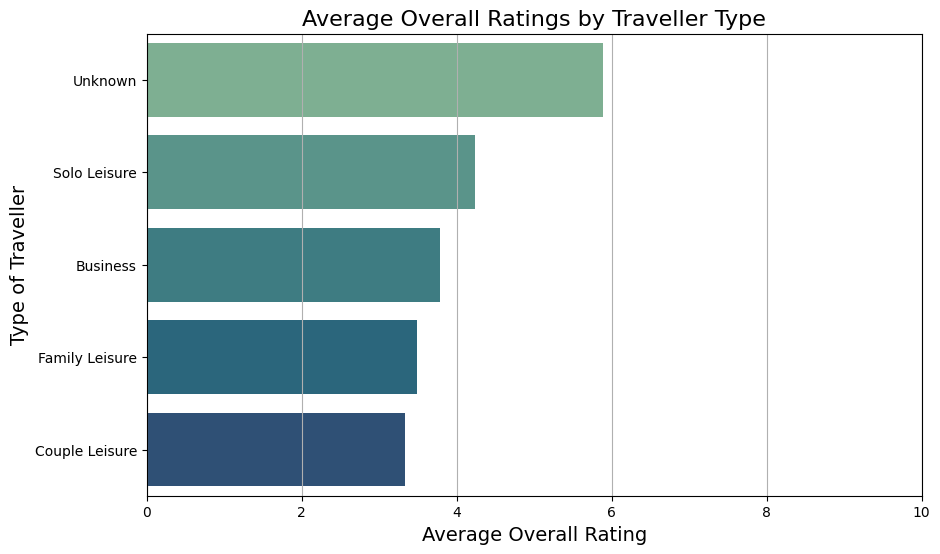

In [27]:

plt.figure(figsize=(10, 6))
sns.barplot(x=average_ratings_by_traveller.values, y=average_ratings_by_traveller.index, palette='crest')
plt.title('Average Overall Ratings by Traveller Type', fontsize=16)
plt.xlabel('Average Overall Rating', fontsize=14)
plt.ylabel('Type of Traveller', fontsize=14)
plt.xlim(0, 10)  
plt.grid(axis='x')  

Comments:
- Unknown (5.88): The 'Unknown' category refers to missing data that have been treated and replaced, suggesting that these ratings may not accurately reflect a specific group. This could mean that the missing data tends to come from passengers who had positive experiences, or it may indicate patterns that require further investigation to understand why the data is missing.

- Solo Leisure (4.24): This group has a moderate average rating, which indicates that solo leisure travellers are fairly satisfied, but there is still room for improvement. Certain aspects of their travel experience, such as comfort or service, could be enhanced to increase their satisfaction.

- Business (3.79): Business travellers show lower satisfaction levels compared to solo leisure travellers. This may suggest that their expectations are not being met, as they typically value efficiency, comfort, and high-quality service. The airline might need to focus on improving offerings for this group to enhance their experiences.

- Family Leisure (3.49): Families have a considerably lower average rating, indicating dissatisfaction with some aspects of their overall experience. This highlights the need for airlines to improve family-friendly services, including better amenities, seating options, or tailored services for families.

- Couple Leisure (3.33): This group has the lowest average rating, reflecting significant dissatisfaction. Couples may be looking for specific experiences that do not currently meet their expectations, possibly due to a lack of targeted services or amenities designed for couples travelling together.


Conclusions:

- Disparity in Satisfaction: The differences in average ratings show varying levels of satisfaction among different types of travellers. While the 'Unknown' group appears satisfied, business, family, and couple leisure travellers report lower satisfaction levels, indicating a need for attention.

- Targeted Improvements: The lower ratings from families and couples signal a clear need for focused improvements in service delivery. Enhancing amenities aimed at families and couples can help ensure that their specific expectations are met.

- Addressing Business Traveller Needs: The ratings suggest that business travellers also need attention. High expectations from this group mean that airlines should work to improve comfort, service speed, and facilities that cater specifically to their needs.

- Understanding Missing Data: The high rating in the 'Unknown' category indicates that airlines should explore the reasons behind missing data. 


How Do Overall Ratings Change Over Time? Analysing trends in overall ratings over time can reveal patterns in customer satisfaction:

In [28]:
# Create a new column for year-month to analyse trends over time more effectively

flight['YearMonth'] = flight['Published'].dt.to_period('M')

# Check the updated 
flight.head()

,Published,Overall_Rating,Country,Verified,Title,Comment,Traveller,Seat,Origin,Destination,Date Flown,Comfort,Staff,Food,Ground,Worth,YearMonth
0,2024-02-03,10.0,United Kingdom,True,"""bang on time and smooth flights""",Flew back from Faro to London Luton Friday 2nd...,Family Leisure,Economy Class,Faro,Luton,2024-02-01 00:00:00,4.0,5.0,3.0,4.0,4.0,2024-02
1,2024-01-26,10.0,United Kingdom,True,"""Another good affordable flight""",Another good affordable flight with Ryanair. O...,Couple Leisure,Economy Class,Belfast,Alicante,2024-01-01 00:00:00,3.0,5.0,3.0,5.0,5.0,2024-01
2,2024-01-20,10.0,United Kingdom,True,“Really impressed!”,"Really impressed! You get what you pay for, th...",Couple Leisure,Economy Class,Edinburgh,Paris Beauvais,2023-10-01 00:00:00,5.0,5.0,4.0,5.0,5.0,2024-01
3,2024-01-07,6.0,United Kingdom,True,“a decent offering from Ryanair”,I should like to review my flight from Faro to...,Solo Leisure,Economy Class,Faro,Liverpool,2024-01-01 00:00:00,3.0,2.0,1.0,3.0,3.0,2024-01
4,2024-01-06,10.0,Israel,True,“cabin crew were welcoming and friendly”,"Flight left the gate ahead of schedule, fare w...",Solo Leisure,Economy Class,Dublin,Manchester,2024-01-01 00:00:00,4.0,5.0,1.0,4.0,5.0,2024-01


In [29]:
# Calculate average overall rating per Year
flight['Year'] = flight['Published'].dt.year
average_ratings = flight.groupby('Year')['Overall_Rating'].mean().reset_index()

In [30]:
# Display a preview of the results

average_ratings

,Year,Overall_Rating
0,2012,4.150000
1,2013,5.609589
2,2014,6.088496
3,2015,5.290123
4,2016,6.132184
5,2017,4.034682
6,2018,3.045455
7,2019,2.797143
8,2020,3.109091
9,2021,2.625000


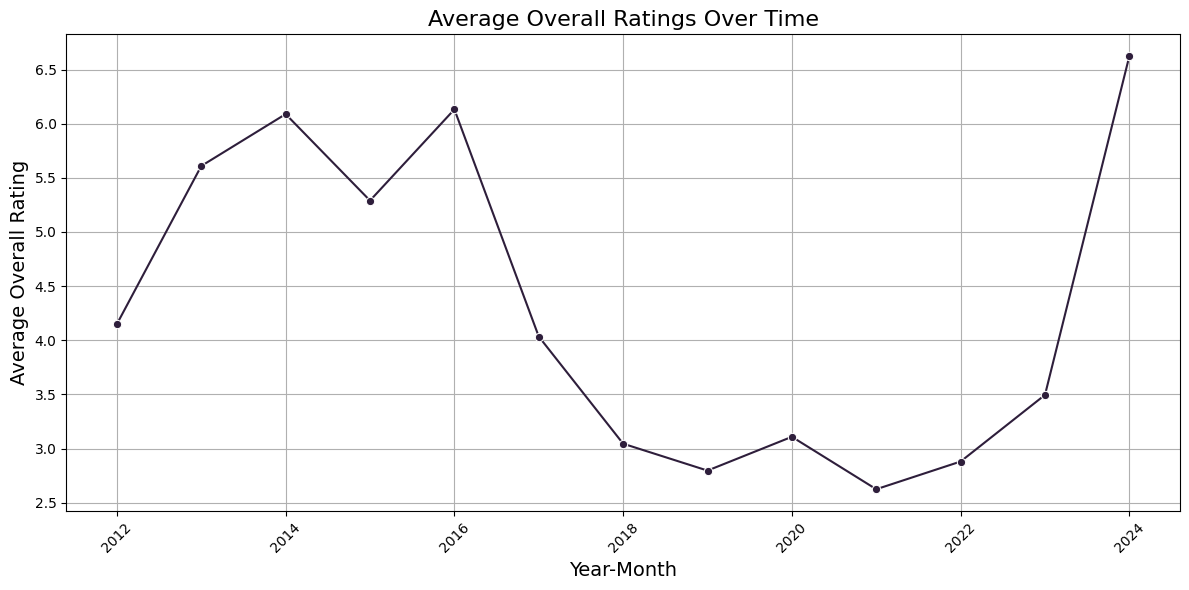

In [31]:
# Plot the trend of average overall ratings over time

plt.figure(figsize=(12, 6))
sns.lineplot(data=average_ratings, x='Year', y='Overall_Rating', marker='o')
plt.title('Average Overall Ratings Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Average Overall Rating', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Comments: 

- There is an evident increase in average overall ratings from 2012 to 2014, with ratings rising from approximately 4.15 to 6.09. This suggests that there were improvements in service or customer satisfaction during this period, possibly due to positive changes implemented by the airline.

- Following the peak in 2014, the ratings show some fluctuation, dropping in 2015, slightly rising in 2016, and then experiencing a noticeable decline from 2017 to 2019. This decline could indicate challenges or issues that negatively impacted passenger satisfaction, such as changes in service quality or external factors affecting customer perceptions.

- The trend of low ratings continued into the early 2020s, with the average ratings remaining below 4.0 from 2018 to 2022. This indicates a sustained period of dissatisfaction among passengers, emphasising the need for the airline to investigate underlying issues and develop strategies to improve customer experience.

- Interestingly, there is a substantial increase in the ratings for 2024, with an average of 6.63. This significant uptick suggests that recent efforts may have successfully addressed previous issues, resulting in enhanced passenger satisfaction.



Are there significant differences in seat comfort ratings based on seat type?

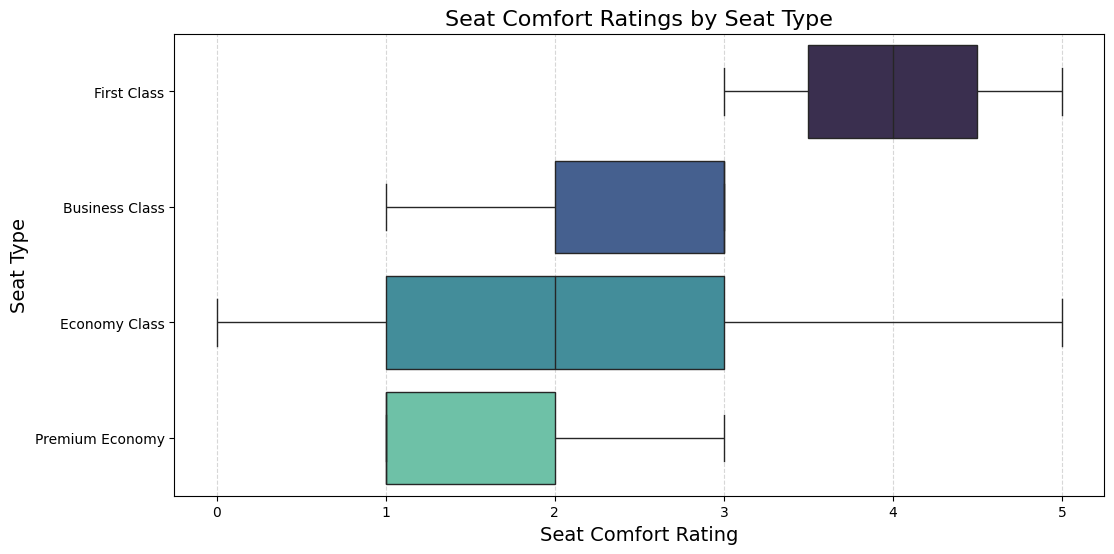

In [32]:
# plotting the distribution of seat comfort ratings for each group.

seat_comfort_by_seat_type = flight.groupby('Seat')['Comfort'].median().sort_values(ascending=False)
seat_comfort_by_seat_type


plt.figure(figsize=(12, 6))
sns.boxplot(data=flight, x='Comfort', y='Seat', palette='mako', order=seat_comfort_by_seat_type.index)
plt.title('Seat Comfort Ratings by Seat Type', fontsize=16)
plt.xlabel('Seat Comfort Rating', fontsize=14)
plt.ylabel('Seat Type', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

- From the boxplot above it is possible to see that:

Economy Class, with the most substantial number of data points (2,229), shows an average comfort rating of approximately 2.36, with a broad range of ratings from 0 to 5, indicating varied passenger experiences. This diversity may be attributed to the large number and range of passengers using this class, each with different comfort expectations and experiences.

Business Class, with a limited dataset of only 3 entries, has an average comfort rating of about 2.33. The narrow range reflects more consistent but generally lower comfort ratings, which might be unusual for this class. The small sample size likely affects the reliability of these results.

First Class, with just 2 entries, records a higher average comfort rating of 4, which aligns with expectations of superior comfort and enhanced amenities offered in this class. The small sample size suggests caution in drawing firm conclusions, but it generally supports the perception of First Class as offering better comfort.

Premium Economy, with 15 entries, shows the lowest average comfort rating at 1.67. This could suggest that the amenities in Premium Economy may not justify the step up from Economy Class, or perhaps the limited entries don't fully capture the experience offered. This analysis highlights significant variances in comfort ratings across seat types, potentially pointing to areas where passenger comfort could be improved, especially in Premium Economy.

Geographical Analysis:

- Do ratings vary by passenger country, origin, or destination? Are there specific routes that receive consistently higher or lower ratings?

In [33]:
#verage overall rating for each passenger country

average_ratings_by_country = flight.groupby('Country')['Overall_Rating'].mean().reset_index()

In [34]:
# Sort the results for better visualisation

average_ratings_by_country = average_ratings_by_country.sort_values(by='Overall_Rating', ascending=False)

In [35]:
average_ratings_by_country

,Country,Overall_Rating
62,Sri Lanka,10.0
34,Jordan,9.5
4,Belarus,8.6
36,Laos,8.5
11,China,8.0
...,...,...
7,Brunei,1.0
41,Macedonia,1.0
42,Malaysia,1.0
55,Russian Federation,1.0


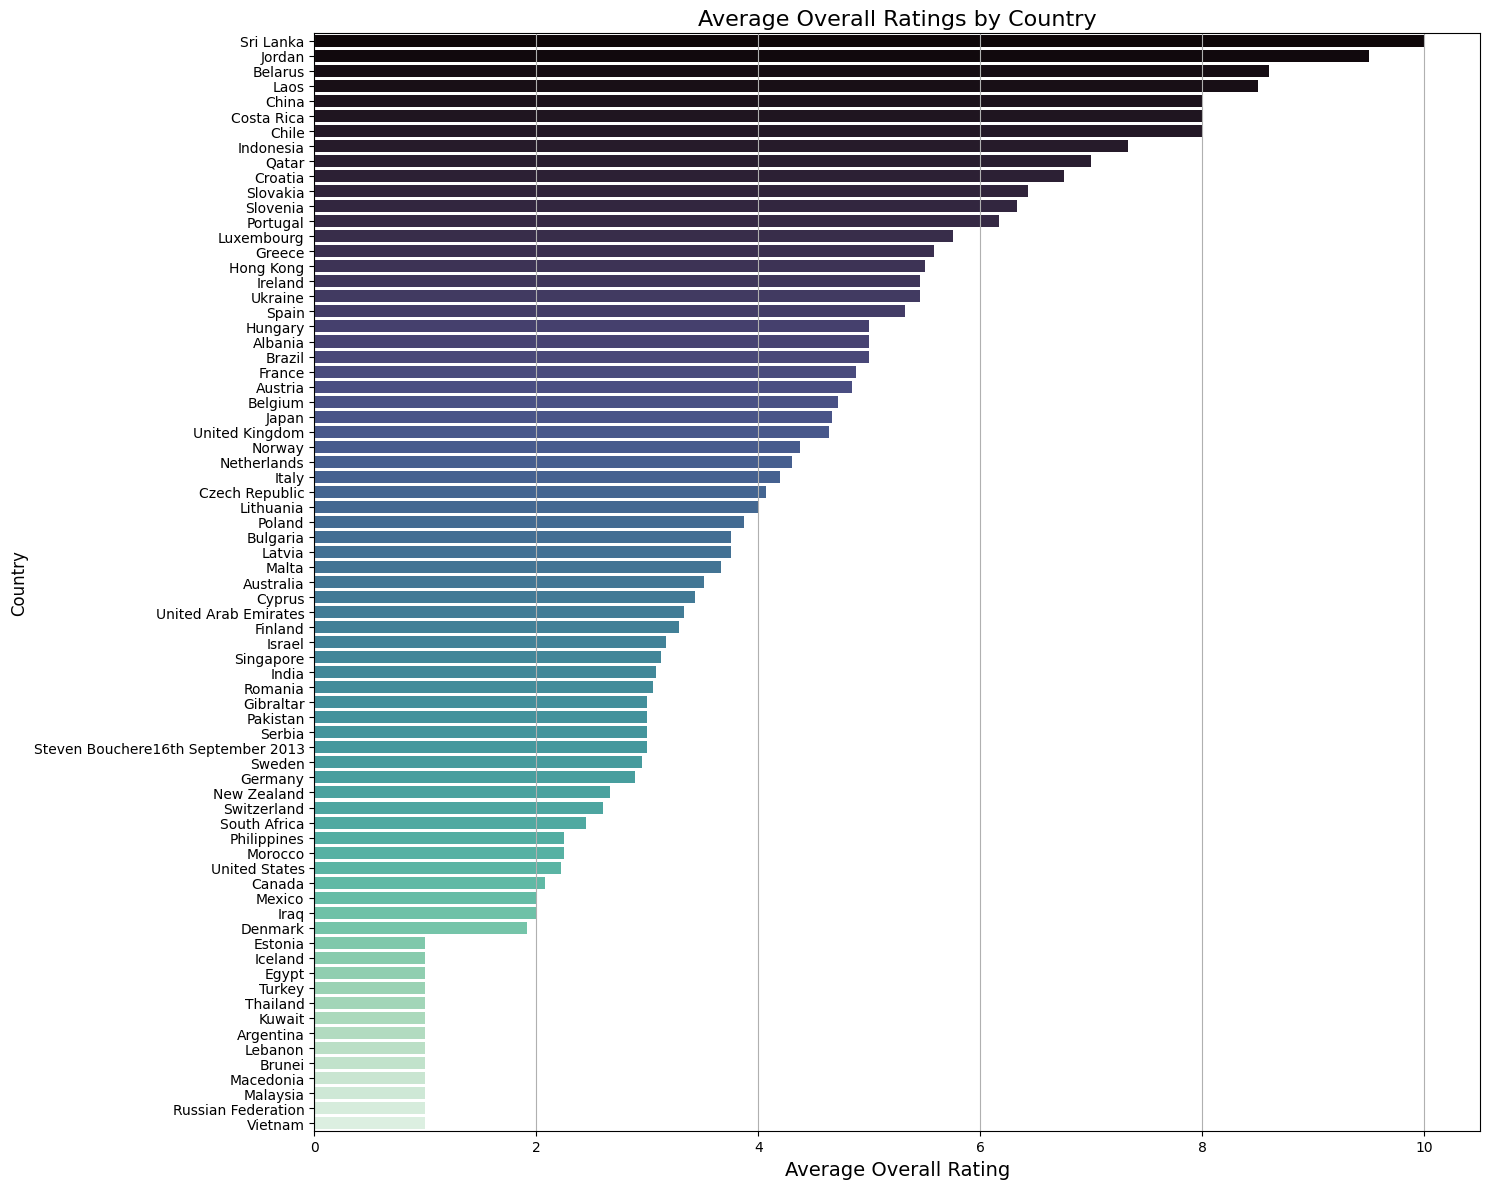

In [36]:
plt.figure(figsize=(15, 12))
sns.barplot(data=average_ratings_by_country, x='Overall_Rating', y='Country', palette='mako')
plt.title('Average Overall Ratings by Country', fontsize=16)
plt.xlabel('Average Overall Rating', fontsize=14)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

- High Satisfaction Countries: Sri Lanka, Jordan, Belarus, Laos, and China have high average ratings, with Sri Lanka at the top. This suggests passengers from these countries have positive experiences, possibly due to good service, favourable routes, or a strong connection with the airline.

- Low Satisfaction Countries: In contrast, countries like Brunei, Macedonia, Malaysia, the Russian Federation, and Vietnam have very low ratings. This indicates dissatisfaction, likely stemming from issues such as poor service or unmet expectations.

- Diverse Ratings Across Countries: There is a notable difference in ratings across countries, showing how passenger satisfaction varies geographically. This highlights the need to understand regional differences and customise services accordingly.

- Targeted Improvements: For countries with low ratings, the airline should explore why passengers are unhappy. This might involve deeper feedback analysis or engaging with customers to resolve specific issues.

- Cultural and Regional Influence: Airlines should consider cultural and regional factors influencing satisfaction. High ratings in some countries could show strong brand presence, whereas low ratings indicate where improvements are needed.

Correlation analysis: 

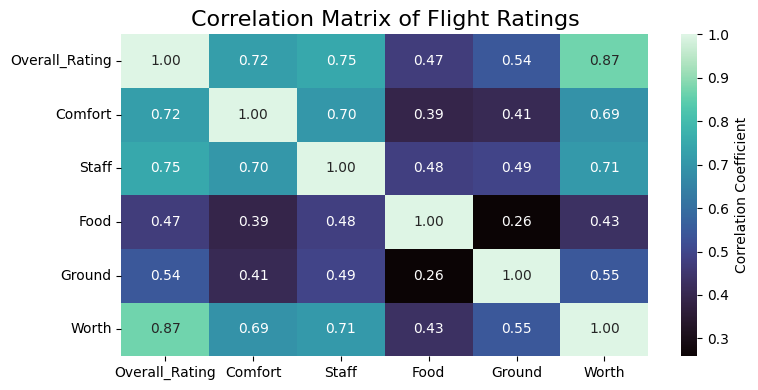

In [37]:
corr_matrix = flight[['Overall_Rating', 'Comfort', 'Staff', 'Food', 'Ground', 'Worth']].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='mako', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Flight Ratings', fontsize=16)
plt.tight_layout()  
plt.show()

Corr analysis:

The 'Overall Rating' is most strongly correlated with 'Worth' at 0.869, suggesting that passengers who feel they receive good value for money tend to rate their overall experience higher. Comfort and staff service also show a strong correlation with the overall rating (0.721 and 0.746, respectively), indicating that these factors significantly influence passenger satisfaction. 

The correlation between 'Staff' and 'Worth' is also high at 0.708, implying that positive interactions with staff contribute to perceptions of receiving value for money. Similarly, 'Comfort' has a notable impact on both 'Overall Rating' and 'Worth', but slightly less than staff service.

'Food' and 'Ground' services have weaker correlations with the 'Overall Rating' (0.472 and 0.544, respectively), suggesting they are less critical to overall satisfaction compared to comfort and staff interactions. These moderate correlations might reflect that food service is a supplementary aspect of the passenger experience, and ground services, while important, do not weigh as heavily as onboard experience elements in determining overall satisfaction.